# Goal:
Create a neural network for binary classification, able to predict the probability of a patient having breast cancer.

In [534]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers

# Dataset

In [535]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [536]:
df = pd.DataFrame(breast_cancer_dataset.data, columns= breast_cancer_dataset.feature_names)

In [537]:
df['target'] = breast_cancer_dataset.target

In [538]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [539]:
df.shape

(569, 31)

In [540]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [541]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [542]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [543]:
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [544]:
df.groupby('target').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


# Data Preprocessing

In [545]:
# Split the data into Train, Dev, and Test
X, Y =  breast_cancer_dataset.data, breast_cancer_dataset.target

In [546]:
Y = Y.reshape(-1,1)

In [547]:
X_train, X_, Y_train, Y_ = train_test_split(X,Y,train_size=0.6,random_state=1)
X_test, X_cv, Y_test, Y_cv = train_test_split(X_, Y_, train_size=0.5, random_state=1)
del X_, Y_

In [548]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_cv_scaled = scaler.transform(X_cv)
X_test_scaled = scaler.transform(X_test)

# Model implementation

In [549]:
model = Sequential([
    Flatten(input_shape = (X_train_scaled.shape[1],)),
    Dense(20, activation = 'relu',kernel_regularizer=regularizers.l2(0.0000001)),
    Dense(10, activation = 'relu',kernel_regularizer=regularizers.l2(0.0000001)),
    Dense(5, activation = 'relu',kernel_regularizer=regularizers.l2(0.0000001)),
    Dense(1, activation = 'linear')
])

In [550]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(0.01),
    loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

In [551]:
history = model.fit(X_train_scaled,Y_train, epochs=1000)

Epoch 1/1000


11/11 [==============================] - 1s 1ms/step - loss: 0.4043 - accuracy: 0.7273
Epoch 2/1000
11/11 [==============================] - 0s 852us/step - loss: 0.0882 - accuracy: 0.9736
Epoch 3/1000
11/11 [==============================] - 0s 800us/step - loss: 0.0636 - accuracy: 0.9795
Epoch 4/1000
11/11 [==============================] - 0s 944us/step - loss: 0.0553 - accuracy: 0.9853
Epoch 5/1000
11/11 [==============================] - 0s 836us/step - loss: 0.0463 - accuracy: 0.9883
Epoch 6/1000
11/11 [==============================] - 0s 105us/step - loss: 0.0385 - accuracy: 0.9883
Epoch 7/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.0316 - accuracy: 0.9912
Epoch 8/1000
11/11 [==============================] - 0s 865us/step - loss: 0.0276 - accuracy: 0.9912
Epoch 9/1000
11/11 [==============================] - 0s 800us/step - loss: 0.0226 - accuracy: 0.9941
Epoch 10/1000
11/11 [==============================] - 0s 957us/step - loss: 0.0191 - accuracy: 0.9

# Model evaluation

In [552]:
# calculate the mse of training set
prediction_train = model.predict(X_train_scaled)
Yhat_train = tf.nn.sigmoid(prediction_train)
Yhat_train = np.where(Yhat_train >= 0.5, 1 , 0)
mse_train = mean_squared_error(Y_train, Yhat_train)
mse_train

11/11 [==============================] - 0s 694us/step


0.0

In [553]:
# calculate the mse of dev set
prediction_cv = model.predict(X_cv_scaled)
Yhat_cv = tf.nn.sigmoid(prediction_cv)
Yhat_cv = np.where(Yhat_cv >= 0.5, 1 , 0)
mse_cv = mean_squared_error(Y_cv, Yhat_cv)
mse_cv

4/4 [==============================] - 0s 2ms/step


0.02631578947368421

# Predictions and accuracy

In [554]:
# The model seems fitting ok, without any high variance or high bias, let's make predictions
prediction_test = model.predict(X_test_scaled)
Yhat_test = tf.nn.sigmoid(prediction_test)
Yhat_test = np.where(Yhat_test >= 0.5, 1, 0)
accuracy = np.sum(Yhat_test == Y_test)/len(Y_test)
accuracy

4/4 [==============================] - 0s 672us/step


0.9473684210526315

# Loss curve and accuracy

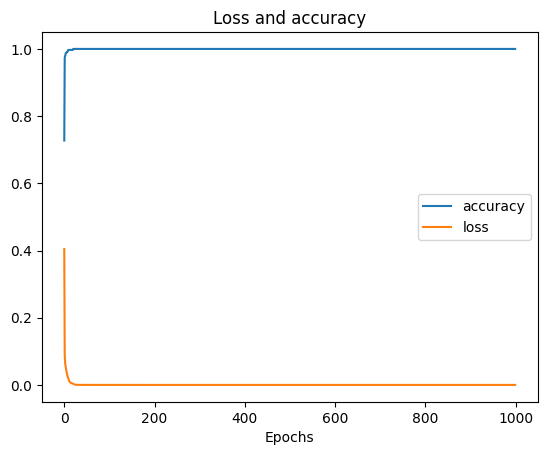

In [558]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])

plt.title("Loss and accuracy")
plt.xlabel("Epochs")
plt.legend(['accuracy','loss'])

